In [1]:
#Packages import
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import math
import astropy.units as u

C:\Users\Nick Landing\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\config\__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to C:\Users\Nick Landing\.lightkurve\cache. Please move all the files in the legacy directory C:\Users\Nick Landing\.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
# Search for your target using its TIC ID 
TIC = 'TIC 4918919' 

In [3]:
# Check the availability of the data for this target
available_data_all = lk.search_lightcurve(TIC);

In [4]:
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 21,2020,TESS-SPOC,1800,4918919,0.0
1,TESS Sector 48,2022,TESS-SPOC,600,4918919,0.0
2,TESS Sector 21,2020,QLP,1800,4918919,0.0
3,TESS Sector 48,2022,QLP,600,4918919,0.0


In [5]:
# Search for and download the light curve
search_result = lk.search_lightcurve(TIC, sector=21, author="TESS-SPOC")
sector1b = search_result.download_all()
sector1 = sector1b.PDCSAP_FLUX.stitch().remove_nans()

C:\Users\Nick Landing\AppData\Local\Temp\ipykernel_10968\4093804650.py:4: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  sector1 = sector1b.PDCSAP_FLUX.stitch().remove_nans()
C:\Users\Nick Landing\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\collections.py:164: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  return LightCurveCollection([lc.PDCSAP_FLUX for lc in self])


In [6]:
# Search for and download the light curve
search_result = lk.search_lightcurve(TIC, sector=48, author="TESS-SPOC")
sector2b = search_result.download_all()
sector2 = sector2b.PDCSAP_FLUX.stitch().remove_nans()

# Now 'sector2' is a cleaned light curve without NaN values


C:\Users\Nick Landing\AppData\Local\Temp\ipykernel_10968\106461485.py:4: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  sector2 = sector2b.PDCSAP_FLUX.stitch().remove_nans()
C:\Users\Nick Landing\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\collections.py:164: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  return LightCurveCollection([lc.PDCSAP_FLUX for lc in self])


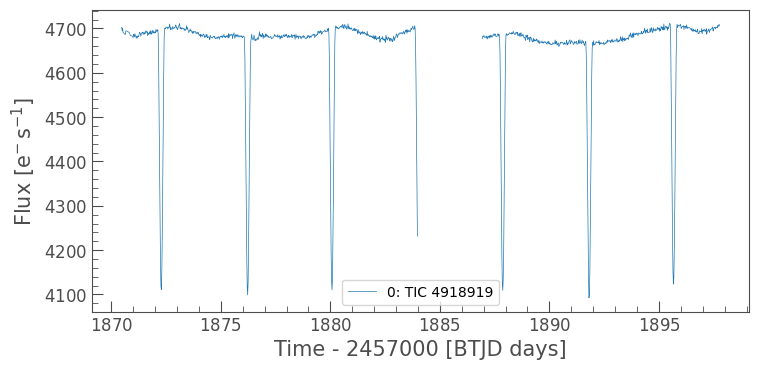

In [8]:
# Plot the light curves with the desired colors and highlighted sectors
ax =sector1b.plot(label='Sector 48', color='blue');
%matplotlib inline
ax.legend();

In [9]:
collect_lc = lk.LightCurveCollection([sector2]).stitch();

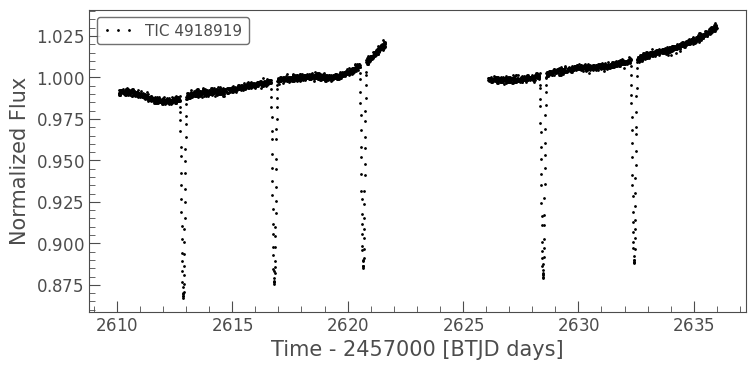

In [10]:
collect_lc.plot(color = 'black', lw = 0, marker = '.');

(0.87, 1.05)

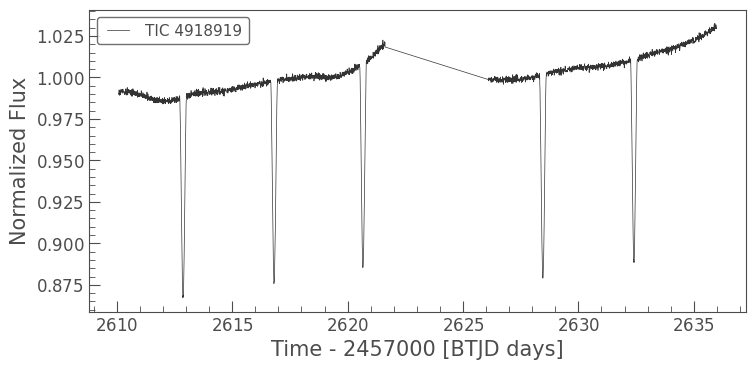

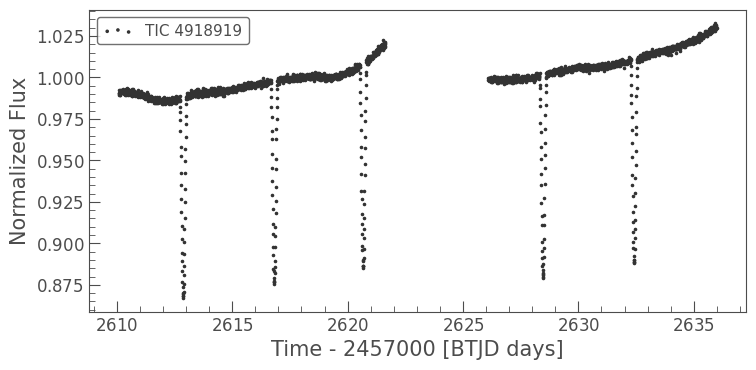

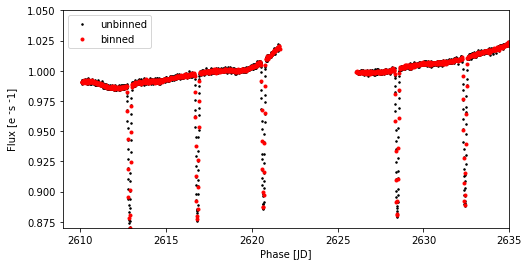

In [12]:
mask = (collect_lc.time.value < 2640)&(collect_lc.time.value > 2610)
masked_lc=collect_lc[mask];
masked_lc.plot();
masked_lc.scatter(s=10);
#Bin the folded lightcurve. Here we bin at 30 minutes.
masked_lc.bin = masked_lc.bin(5/24/10)

fig, ax = plt.subplots(figsize = (8,4))

masked_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
masked_lc.bin.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(2609,2635)
plt.ylim([0.870,1.05])

Period at max power = 3.896296296296297 d
BLS max power = 12569.731863585723
Epoch = 2612.9001742553623
----------------------------------------
Period at second max power = 3.925925925925926 d
BLS max power = 24255.74203259624
Epoch = 2612.830174255362
----------------------------------------
Period at third max power = 3.8666666666666663 d
BLS max power = 5612.305990474471
Epoch = 2612.9601742553623
----------------------------------------
Period at fourth max power = 7.807407407407408 d
BLS max power = 50274.78822372792
Epoch = 2612.8551742553623
----------------------------------------
Period at fifth max power = 7.777777777777779 d
BLS max power = 15429.596962886973
Epoch = 2612.890174255362
----------------------------------------
Period at sixth max power = 7.837037037037037 d
BLS max power = 11767.032517055331
Epoch = 2612.8351742553623
----------------------------------------
Period at seventh max power = 7.7481481481481485 d
BLS max power = 16992.3680757553
Epoch = 2612.92017

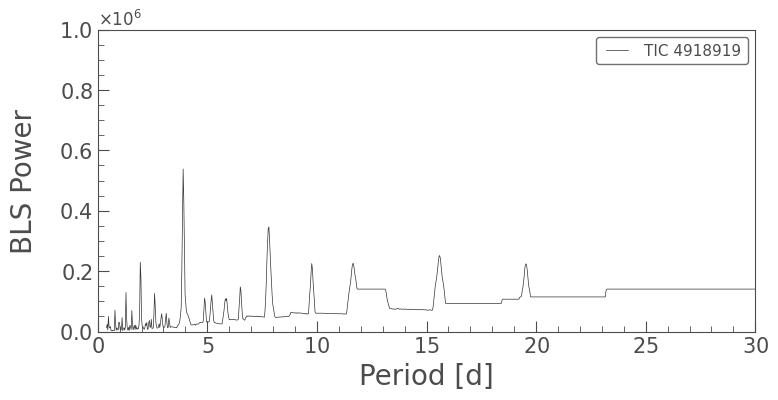

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 1000)
bls = masked_lc.to_periodogram(method='bls', period=period)

# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 30)
plt.ylim([0, 1000000])

# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
epoch = bls.transit_time
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_epoch = epoch[sorted_indices]

# Print the periods and powers of the highest and second highest peaks
#Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
print('Period at max power =', periods[np.argmax(powers)])
print('BLS max power =', np.max(powers[0]))
print('Epoch =', sorted_epoch[0])
print('----------------------------------------')
print('Period at second max power =', sorted_periods[1])
print('BLS max power =', np.max(powers[1]))
print('Epoch =', sorted_epoch[1])
print('----------------------------------------')
print('Period at third max power =', sorted_periods[2])
print('BLS max power =', np.max(powers[2]))
print('Epoch =', sorted_epoch[2])
print('----------------------------------------')
print('Period at fourth max power =', sorted_periods[3])
print('BLS max power =', np.max(powers[3]))
print('Epoch =', sorted_epoch[3])
print('----------------------------------------')
print('Period at fifth max power =', sorted_periods[4])
print('BLS max power =', np.max(powers[4]))
print('Epoch =', sorted_epoch[4])
print('----------------------------------------')
print('Period at sixth max power =', sorted_periods[5])
print('BLS max power =', np.max(powers[5]))
print('Epoch =', sorted_epoch[5])
print('----------------------------------------')
print('Period at seventh max power =', sorted_periods[6])
print('BLS max power =', np.max(powers[6]))
print('Epoch =', sorted_epoch[6])
print('----------------------------------------')
print('Period at eighth max power =', sorted_periods[7])
print('BLS max power =', np.max(powers[7]))
print('Epoch =', sorted_epoch[7])
print('----------------------------------------')
print('Period at ninth max power =', sorted_periods[8])
print('BLS max power =', np.max(powers[8]))
print('Epoch =', sorted_epoch[8])
print('----------------------------------------')
#Choose which power you want done here
print('Period at Fifteenth max power =', sorted_periods[14])
print('BLS max power =', np.max(powers[14]))
print('Epoch =', sorted_epoch[14])
print('----------------------------------------')

(0.87, 1.03)

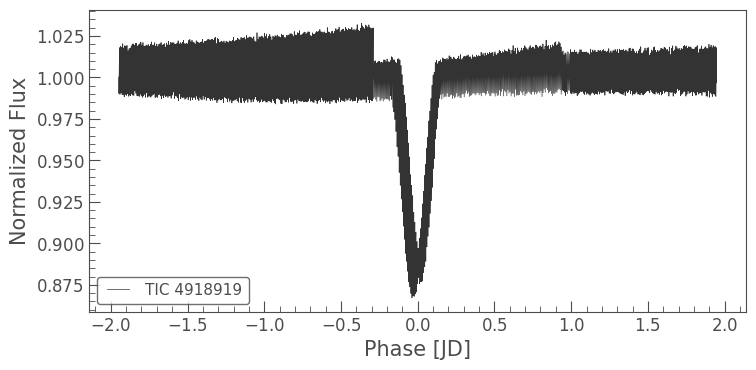

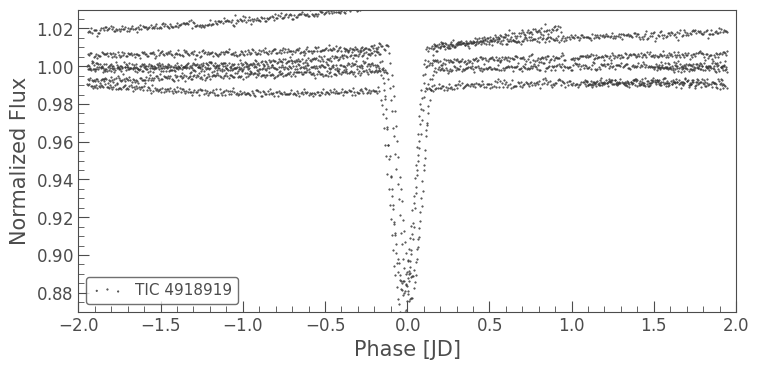

In [20]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
period = 3.896296296296297
epoch_time = 2612.9001742553623
folded_lc = masked_lc.fold(period, epoch_time=epoch_time)
folded_lc.plot();
folded_lc.scatter(s=1);
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-2,2)
plt.ylim([0.870,1.03])

(0.87, 1.03)

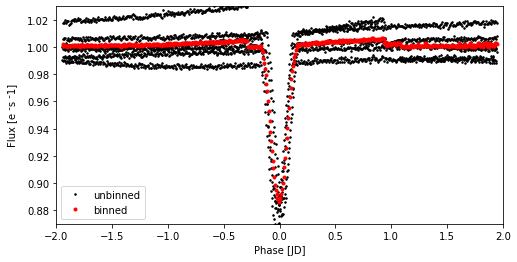

In [21]:
period  = period
t0 = epoch_time

folded2_lc = masked_lc.fold(period, epoch_time=epoch_time)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/30)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-2,2)
plt.ylim([0.870,1.03])

In [22]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  0.8862802386283875
median flux = 1.0017504692077637
Tdepth =  0.11547023057937622
Tdepth in ppm =  115470.23057937622 ppm
Rp/Rs ratio =  0.33980910902943173


In [34]:
planet_b_period = period
planet_b_t0 = epoch_time
planet_b_dur = bls.duration[0]
print(planet_b_period)
print(planet_b_t0)
print(planet_b_dur)

3.896296296296297
2612.9001742553623
0.2 d


In [24]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 4.800000000000001 d hours


In [25]:
#Transit depth from bls model
planet_b_depth = bls.depth[0]
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  0.004147217093172161
depth in ppm = 4147.217093172161 ppm


In [26]:
P = planet_b_period * 24 * 60 * 60  # planet's period
G = 6.674 * 10 ** -11  # gravitational constant
Msun = 1.98847 * 10 ** 30  # Sun mass
M = 1.03 * Msun  # Star's mass
pi = math.pi
a = ((P ** 2) / ((4 * pi ** 2) / (G * M))) ** (1 / 3)  # Orbital radius or semi-major axis
au = a / 1000 * 0.000000006684587  # Orbital Radius AU
AKM = a / 1000  # Orbital Radius KM
print('Orbital Radius')
print('a =', a, 'm')
print('a =', AKM, 'km')
print('a =', au, 'AU')
print('The planetary mass was neglected')


Orbital Radius
a = 7321016571.814836 m
a = 7321016.571814836 km
a = 0.04893797220273802 AU
The planetary mass was neglected


In [27]:
L = 7.142424 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')
if au <= ri and au >= ro:
    print("In the Habitable Zone")
else:
    print("Not in the Habitable Zone")

Habitable Zone
The inner boundary of the habitable zone ri = 2.5481586935025704 AU
The outer boundary of the habitable zone ro = 3.6710041811625884 AU
Not in the Habitable Zone


In [28]:
Rs = 2.68928  #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 636344.6273743949 km
Rp= 99.88143578314157 Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 3.909435251654025


In [29]:
P = planet_b_period * 24 * 60 * 60
pi = math.pi
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 136642.41848159826 m/s


In [30]:
print('Period = ',planet_b_period)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')
print('BJD = ',epoch_time +2457000)

Period =  3.896296296296297
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  4.800000000000001 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  0.11547023057937622
Transit depth in ppm =  115470.23057937622 ppm
Transit Depth from bls model in ppm = 4147.217093172161 ppm
Rp/Rs ratio =  0.33980910902943173
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 636344.6273743949 km
Rp= 99.88143578314157 Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 7321016571.814836 m
a = 7321016.571814836 km
a = 0.04893797220273802 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 3.909435251654025
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 136642.41848159826 m/s
- - - - - - - - - - - - - - - - - - - - 
BJD =  2459612.9001742555


In [37]:
import cmath
#Calculation of total transit duration Tt
Tt = ((((4 * period **(2) * Tdepth ** (1/2))/(math.pi ** 2)) * (((Rs*Rsun)/(a/1000))**(2))) + (int(planet_b_dur) ** (2))) ** (1/2)
print('Total transit duration T14 Tt =', Tt)
print('Tt in hours =', Tt * 24, 'hours')
#Calculation of the impact parameter b for eccentricity e=0
#b = (( ((1-(Tdepth **(1/2)))**(2)-(planet_b_dur/Tt)**(2))* (1+(Tdepth **(1/2)))**(2)  ) / (1 - (planet_b_dur/Tt)**(2) ) ) ** (1/2)
b = abs(( ((1-cmath.sqrt(Tdepth))**(2)-(planet_b_dur/Tt)**(2)) * (1+cmath.sqrt(Tdepth))**(2)  ) / cmath.sqrt(1 - (planet_b_dur/Tt)**(2) ))
print('Impart parameter b =', b)
#Calculation of inclination
i = cmath.acos(b*(Rs*Rsun)/(a/1000))
print('Inclination i =', 90-i, 'deg')

NameError: name 'Tt' is not defined

In [37]:
lk.show_citation_instructions()